In [1]:

####################################################################################################
####################################################################################################

import sys
import os.path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display

import keras
import keras.utils.vis_utils
from keras import backend as K
from keras import layers
from keras.layers import Dense
from keras.models import load_model
from keras.models import Sequential
from keras.utils import plot_model


####################################################################################################
####################################################################################################

%matplotlib inline


Using TensorFlow backend.


In [2]:

####################################################################################################
####################################################################################################

folder   = "models" + "/"    
name     = "model_posreco"
name_h5  = folder + name + ".h5"
name_png = folder + name + ".png"



In [3]:

####################################################################################################
####################################################################################################

model = load_model(name_h5)


In [4]:

####################################################################################################
####################################################################################################

df_train_truth = pd.DataFrame.from_csv("../python_pax_reader/data/train_truth.csv")
df_train_input = pd.DataFrame.from_csv("../python_pax_reader/data/train_input.csv")



In [5]:

####################################################################################################
# First 127 are S2
####################################################################################################

df_train_input = df_train_input.iloc[:, 0:127]
df_train_input.shape


(924, 127)

In [6]:

####################################################################################################
####################################################################################################

arr_predictions = model.predict(df_train_input)
arr_train_truth = df_train_truth.as_matrix()

print(type(arr_predictions))
print(arr_predictions.shape)


<class 'numpy.ndarray'>
(924, 2)


In [7]:

####################################################################################################
####################################################################################################

arr_x_true = np.zeros(0)
arr_y_true = np.zeros(0)

arr_x_pred = np.zeros(0)
arr_y_pred = np.zeros(0)

arr_dx = np.zeros(0)
arr_dy = np.zeros(0)

arr_dx_pct = np.zeros(0)
arr_dy_pct = np.zeros(0)

for i in range(0, arr_train_truth.shape[0]):
    
    xy_true = arr_train_truth[i]
        
    x_true     = xy_true[0]
    y_true     = xy_true[1]

    x_pred     = arr_predictions[i][0]
    y_pred     = arr_predictions[i][1]
    
    dx         = x_true - x_pred
    dy         = y_true - y_pred

    dx_pct     = dx/x_true
    dy_pct     = dy/y_true

    arr_x_true = np.append(arr_x_true, x_true)
    arr_y_true = np.append(arr_y_true, y_true)
    
    arr_x_pred = np.append(arr_x_pred, x_pred)
    arr_y_pred = np.append(arr_y_pred, y_pred)
    
    arr_dx     = np.append(arr_dx, dx)
    arr_dy     = np.append(arr_dy, dy)
    
    arr_dx_pct = np.append(arr_dx_pct, dx_pct)
    arr_dy_pct = np.append(arr_dy_pct, dy_pct)
    
    continue

print("Done")


Done


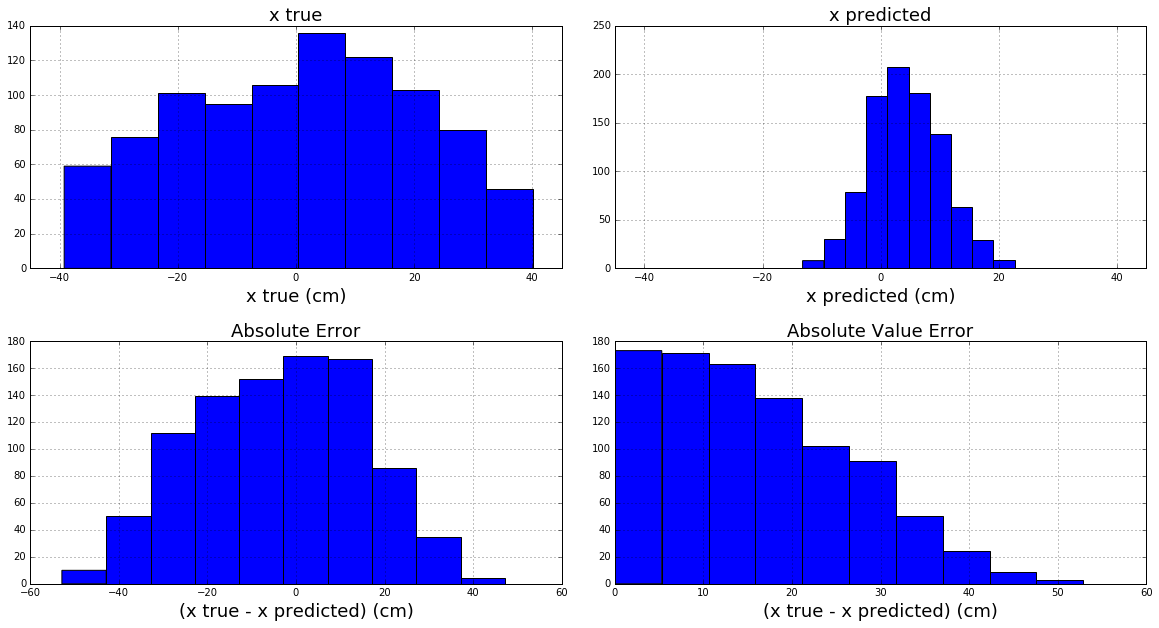

In [8]:

####################################################################################################
####################################################################################################

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.1, hspace=0.3)

plt.subplot(2, 2, 1)
plt.hist(arr_x_true)
plt.xlim([-45, 45])
plt.xlabel('x true (cm)', fontsize=18)
plt.title('x true', fontsize=18)
plt.grid(True)

plt.subplot(2, 2, 2)
plt.hist(arr_x_pred)
plt.xlim([-45, 45])
plt.xlabel('x predicted (cm)', fontsize=18)
plt.title('x predicted', fontsize=18)
plt.grid(True)

plt.subplot(2, 2, 3)
plt.hist(arr_dx)
plt.xlabel('(x true - x predicted) (cm)', fontsize=18)
plt.title('Absolute Error', fontsize=18)
plt.grid(True)

plt.subplot(2, 2, 4)
plt.hist(np.absolute(arr_dx))
plt.xlabel('(x true - x predicted) (cm)', fontsize=18)
plt.title('Absolute Value Error', fontsize=18)
plt.grid(True)

plt.savefig("plots/xy_errors.png")


In [9]:

####################################################################################################
# 1) 1k events linear 127-100-100-40-40-20-20-2   STD ~ 19 cm
####################################################################################################

x_err_abs_mean = np.mean(arr_dx)
x_err_abs_max  = np.amax(arr_dx)
x_err_abs_std  = np.std(arr_dx)

y_err_abs_mean = np.mean(arr_dy)
y_err_abs_max  = np.amax(arr_dy)
y_err_abs_std  = np.std(arr_dy)

print()
print("X Error STD (cm): " + str(x_err_abs_std))
print("Y Error STD (cm): " + str(y_err_abs_std))
print()
print("X Error Max (cm): " + str(x_err_abs_max))
print("Y Error Max (cm): " + str(y_err_abs_max))
print()
print("X Error Mean (cm): " + str(x_err_abs_mean) )
print("Y Error Mean (cm): " + str(y_err_abs_mean))
print()




X Error STD (cm): 18.776616860318086
Y Error STD (cm): 18.938564650764143

X Error Max (cm): 47.20836928014839
Y Error Max (cm): 39.83851192278115

X Error Mean (cm): -3.882348697187026
Y Error Mean (cm): -3.0859406734489587



In [10]:

####################################################################################################
# Results
#
# linear 127-100-100-40-40-20-20-2
#
####################################################################################################
